In [1]:
from utils.analysis.tools import simDir, springPhaseDiagram
from pathlib import Path
from utils.file_operations import input_parse
from tqdm import tqdm
import multiprocessing as mp 
from pathlib import Path
from utils import plot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import matplotlib.patches as mpatches

root = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/04_CoupledFlow/")

In [2]:
no_condensate = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/04_CoupledFlow/20240118_RNAOnly/M1_1.0_b_-0.25_g_-0.1_c_0.0_k_0.05_kp_0.1_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_6_M3_1.0_kt_0.0_rl_9.0_wd_0.0")
no_condensate.run()
no_condensate.rna()
no_condensate_rna = no_condensate.rna_amount[-1]

In [3]:
spd = springPhaseDiagram(root/"20240218_PDFAMSurfaceTension")
spd.extract_data(120)

Using default movie parameters.Using default movie parameters.Using default movie parameters.

Using default movie parameters.Using default movie parameters.


Using default movie parameters.Using default movie parameters.

Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using default movie parameters.
Using de

In [4]:
spd.df.to_pickle("20240218_PDFAMSurfaceTension.pkl")

In [3]:
adf = pd.read_pickle("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/04_Analysis/20240218_PDFAMSurfaceTension.pkl")

In [4]:
gb = adf.groupby("kappa_tilde")
splits = [(x, gb.get_group(x)) for x in gb.groups]
splits.reverse()

In [7]:
def generate_linlog_sequence(min_value, max_value):
    if min_value <= 0 or max_value <= 0:
        raise ValueError("min_value and max_value must be positive")

    sequence = []

    # Start from the smallest power of 10 less than or equal to min_value
    min_power = int(np.floor(np.log10(min_value)))
    max_power = int(np.ceil(np.log10(max_value)))

    for power in range(min_power, max_power + 1):
        # For each power of 10, generate linear sequence
        start = max(10 ** power, min_value)
        end = min(10 ** (power + 1) - 1, max_value)
        sequence.extend(np.arange(start, end + 1, 10 ** power))

    return np.array(sequence)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

Text(0.5, 1.0, 'RNA Enhancement Boundary')

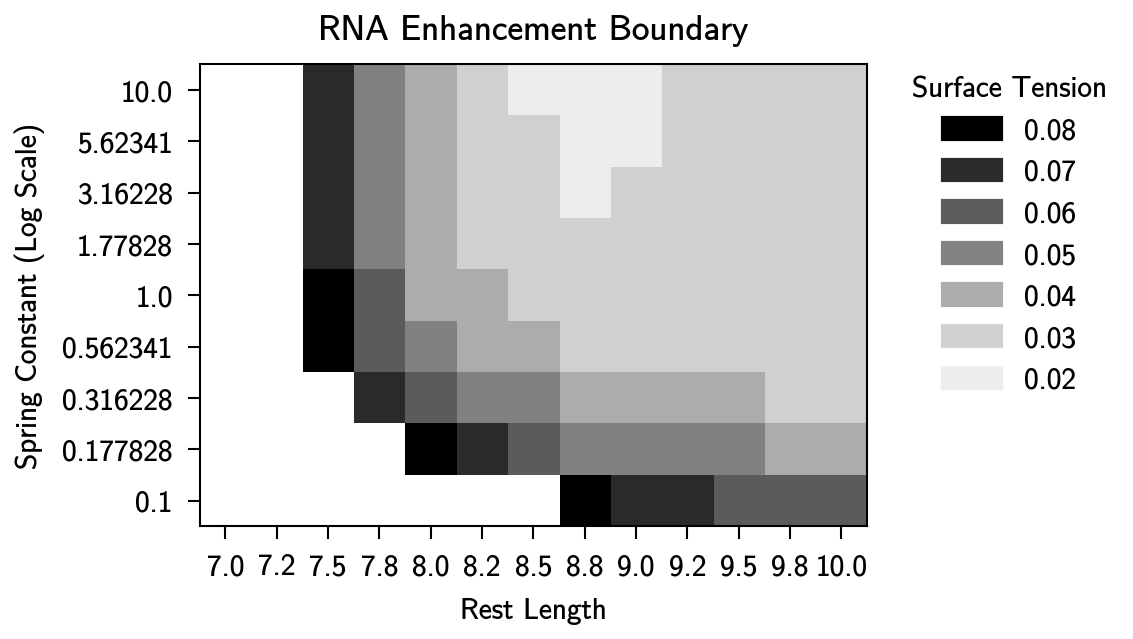

In [14]:
variable="rna_amount"
xlabel="Rest Length"
ylabel="Spring Constant (Log Scale)"
cbarlabel='Steady State $\Delta$ RNA Amount'
fig, ax = plt.subplots()

values = []
for st, df in splits:
    pivot = df.pivot_table(index="k_tilde",columns="rest_length",values=variable)-no_condensate_rna
    pivot[pivot>1] = np.nan
    pivot[pivot<1] = float(st)
    im = ax.imshow(pivot,vmin=0.01,vmax=0.08,cmap="Greys")
    values.append(float(st))
    ax.set_xticks(np.arange(len(pivot.columns)))
    ax.set_xticklabels(pivot.columns)
    ax.set_yticks(np.arange(len(pivot.index)))
    ax.set_yticklabels(pivot.index)
    ax.invert_yaxis()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    for spine in ax.spines:
        ax.spines[spine].set_visible(True)
        
colors = [im.cmap(im.norm(value)) for value in values]
patches = [mpatches.Patch(color=colors[i], label="{l}".format(l=values[i]) ) for i in range(len(values)) ]
ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
          title="Surface Tension")
ax.set_title("RNA Enhancement Boundary")

# ax.yaxis.set_minor_locator(ticker.FixedLocator(map_y(generate_linlog_sequence(0.01,1))))
# ax.set_yticks(map_y(np.array([0.01,0.1,1])))
# ax.set_yticklabels([f"$10^{{{i}}}$" for i in [-2,-1,0]])


In [18]:
df["rest_length"] = df["rest_length"].astype(np.float64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

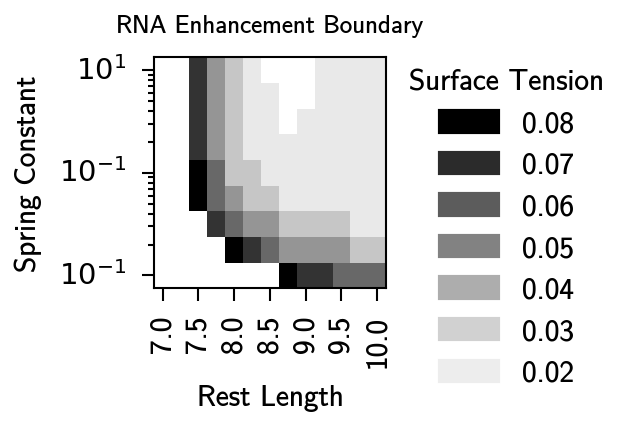

In [31]:
variable="rna_amount"
xlabel="Rest Length"
ylabel="Spring Constant"
cbarlabel='Steady State $\Delta$ RNA Amount'
fig, ax = plt.subplots()
fig.set_size_inches(1,1)

values = []
for st, df in splits:
    pivot = df.pivot_table(index="k_tilde",columns="rest_length",values=variable)-no_condensate_rna
    pivot[pivot>1] = np.nan
    pivot[pivot<1] = float(st)
    im = sns.heatmap(pivot,vmin=0.02,vmax=0.08,cmap="Greys",cbar=False)
    values.append(float(st))
    # ax.set_xticks(np.arange(len(pivot.columns)))
    # ax.set_xticklabels(pivot.columns)
    ax.set_yticks(np.arange(len(pivot.index)))
    ax.set_yticklabels(pivot.index)
    ax.invert_yaxis()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    for spine in ax.spines:
        ax.spines[spine].set_visible(True)
        
# colors = [im.cmap(im.norm(value)) for value in values]
patches = [mpatches.Patch(color=colors[i], label="{l}".format(l=values[i]) ) for i in range(len(values)) ]
ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
          title="Surface Tension")
ax.set_title("RNA Enhancement Boundary", fontsize=6)

# for c in [20,80,300]:
#     line_x = np.linspace(6.9,10.1)
#     line_y = c/line_x**2

#     x_min, x_max = pivot.columns.min(), pivot.columns.max()
#     mapped_x = (line_x - x_min) / (x_max - x_min) * (len(pivot.columns) - 1)+0.5

#     # Map y coordinates (logarithmic scale)
#     y_min, y_max = np.log(pivot.index.min()), np.log(pivot.index.max())
#     mapped_y = (np.log(line_y) - y_min) / (y_max - y_min) * (len(pivot.index) - 1)+0.5

#     line, = ax.plot(mapped_x,mapped_y,color="grey")
#     plot.add_arrow(line,direction='left')

def map_y(y):
    return (np.log(y) - y_min) / (y_max - y_min) * (len(pivot.index) - 1)+0.5

def map_y(y):
    return (np.log(y) - y_min) / (y_max - y_min) * (len(pivot.index) - 1)+0.5

ax.yaxis.set_minor_locator(ticker.FixedLocator(map_y(generate_linlog_sequence(0.1,10))))
ax.set_yticks(map_y(np.array([0.1,1,10])))
ax.set_yticklabels([f"$10^{{{i}}}$" for i in [-1,-1,1]])
fig.savefig("boundary.png",dpi=300,transparent=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

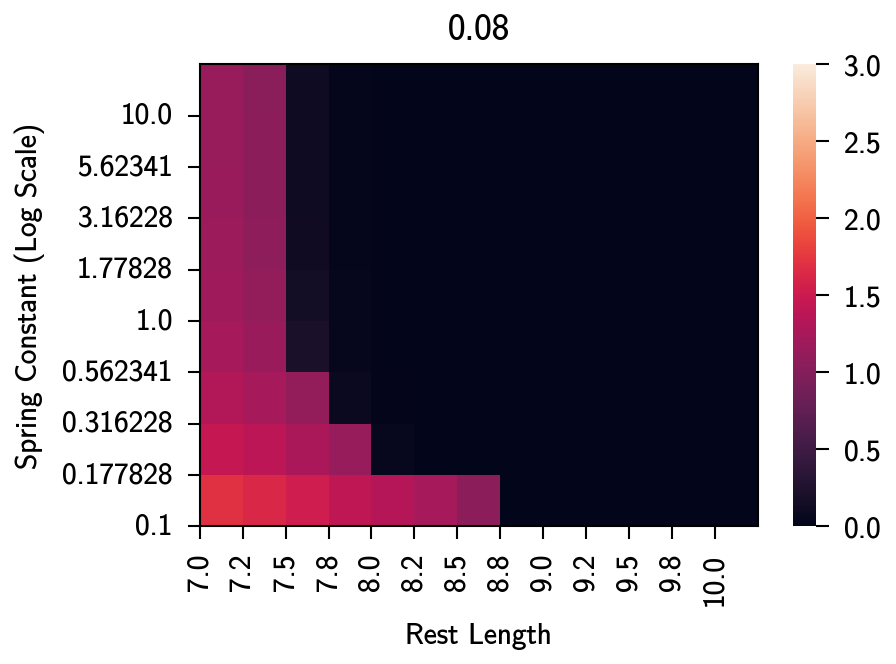

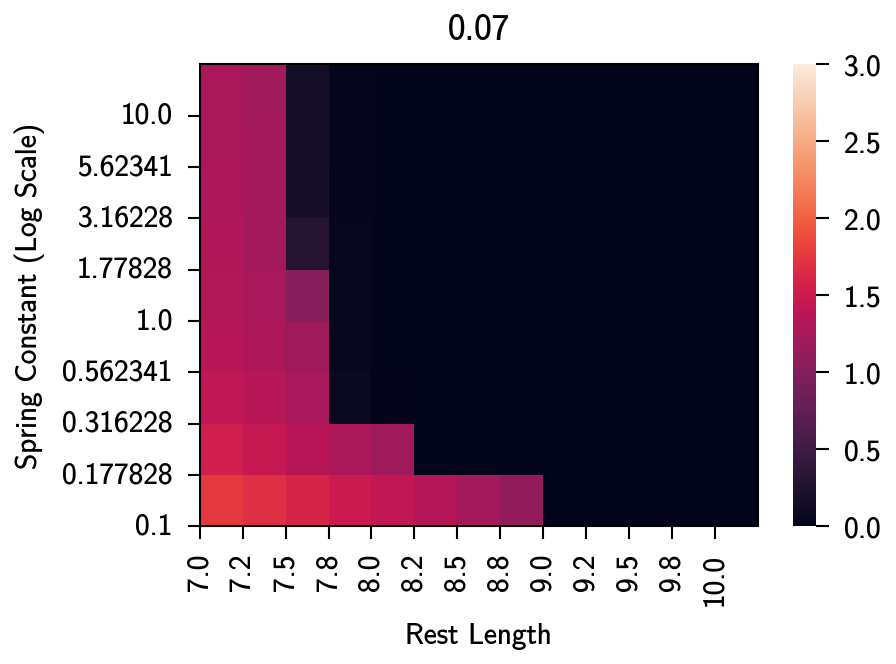

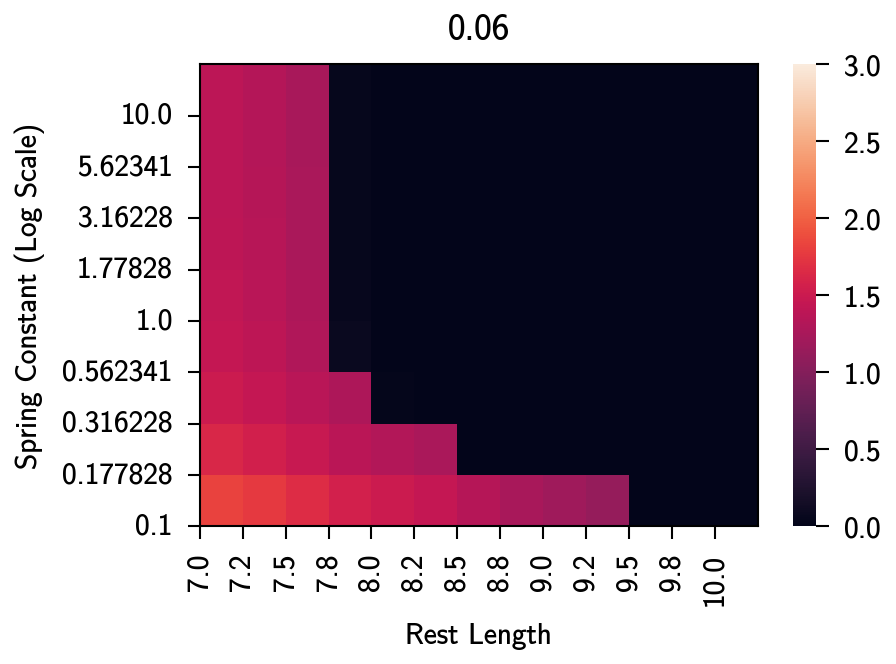

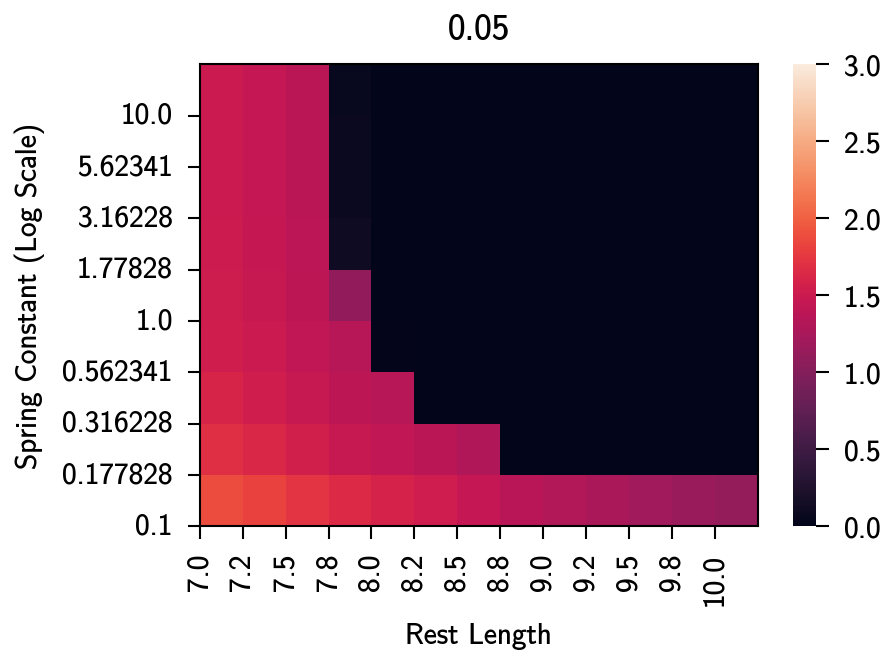

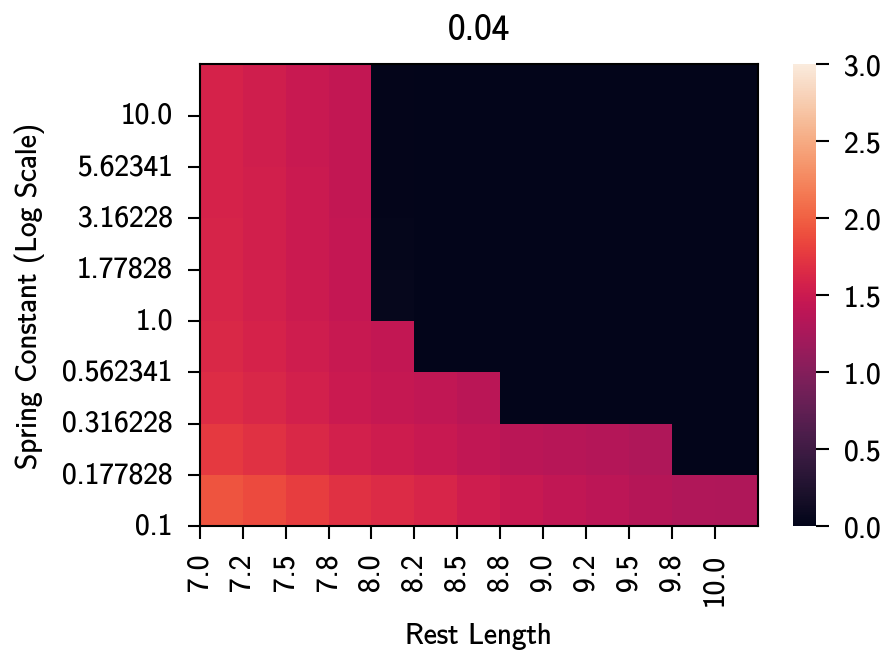

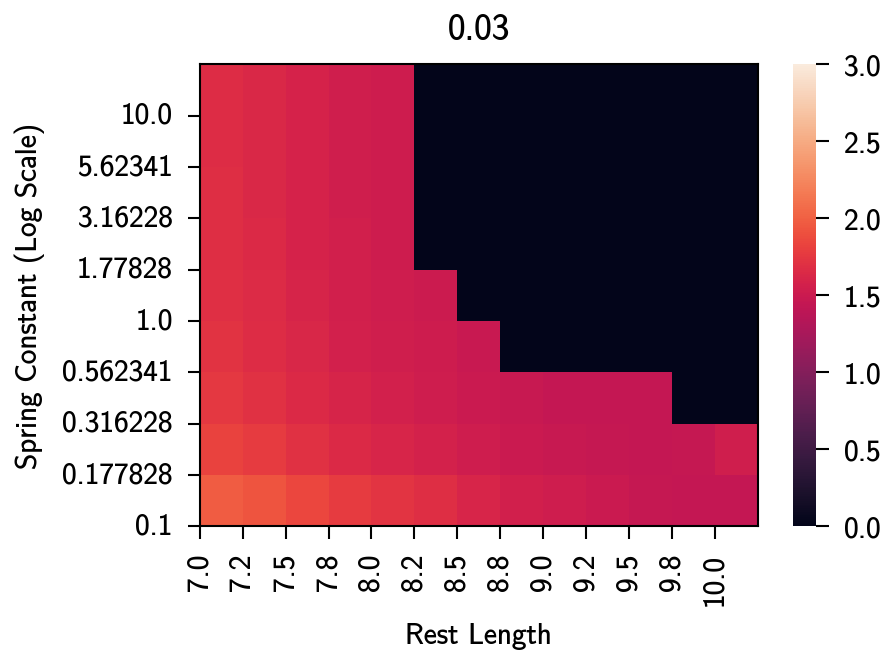

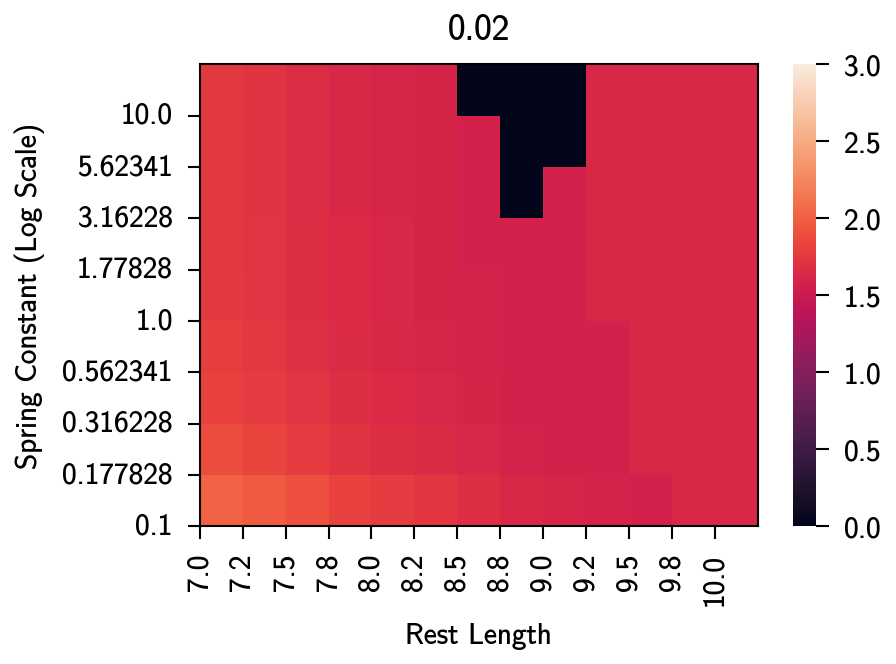

In [16]:
variable="rna_amount"
xlabel="Rest Length"
ylabel="Spring Constant (Log Scale)"
cbarlabel='Steady State $\Delta$ RNA Amount'


values = []
for st, df in splits:
    fig, ax = plt.subplots()
    pivot = df.pivot_table(index="k_tilde",columns="rest_length",values=variable)-no_condensate_rna
    im = sns.heatmap(pivot,vmin=0,vmax=3,cmap="rocket")
    values.append(float(st))
    ax.set_xticks(np.arange(len(pivot.columns)))
    ax.set_xticklabels(pivot.columns)
    ax.set_yticks(np.arange(len(pivot.index)))
    ax.set_yticklabels(pivot.index)
    ax.invert_yaxis()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.set_title(f"{st}")
    for spine in ax.spines:
        ax.spines[spine].set_visible(True)
        
# colors = [im.cmap(im.norm(value)) for value in values]
patches = [mpatches.Patch(color=colors[i], label="{l}".format(l=values[i]) ) for i in range(len(values)) ]


# ax.yaxis.set_minor_locator(ticker.FixedLocator(map_y(generate_linlog_sequence(0.01,1))))
# ax.set_yticks(map_y(np.array([0.01,0.1,1])))
# ax.set_yticklabels([f"$10^{{{i}}}$" for i in [-2,-1,0]])
